In [388]:
# import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import PoissonRegressor
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm



In [35]:
## define funciton that fits poisson regression



# build model

def poissonR(X,Y,train):
    '''
    inputs:
        X: explanatory variables (dataframe)
        Y: output variable (dataframe)
        train: do training or not (boolean)
        
    outputs:
        parameters: possion regressor parameters
        intercept: value of independetn term (y intercept), 
        coefficients: coefficients of explanatory vairables (all linera)
        y_test: testing data
        predictions: predicted data
        stats : summary of statistics of the predictive power of the model
    
    
    '''
    
    # turn categorical into dummies
    X = pd.get_dummies(data=X, drop_first=True)
    
    # build model
    pr = PoissonRegressor(alpha=0, fit_intercept=True)
    
    # fit model
    pr.fit(X, Y)
    parameters=pr.get_params()
    intercept=pr.intercept_
    coefficients= pd.DataFrame(pr.coef_,X.columns,columns=['Coefficient'])
    
    y_train=0
    predictions=0 
    stats=0
    
    if train==1:
        
        # split data into train and test (test_size specifies %)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
        
        # fit training
        pr.fit(X_train,y_train)
        
        # use model to predict
        predictions = pr.predict(X_test)

        X_train_Sm= sm.add_constant(X_train)
        ls=sm.OLS(y_train,X_train_Sm).fit()
        stats=ls.summary()
        
        

        
    
    return parameters, intercept, coefficients, y_test, predictions, stats
    


In [36]:
## import data frames

fullData = pd.read_csv("31DayDataUpdate.csv")
myData = fullData[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]

fullData = pd.read_csv("62DayDataUpdate.csv")
myData2 = fullData[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals62DayStandard','NumberOfEligibleReferralsTreatedWithin62Days']]

weekdata = pd.read_csv("cancerdata.csv")


In [37]:
## edit 31 days data

df=myData

# remove Nans
df = df[df['NumberOfEligibleReferrals31DayStandard'].notna()]
df = df[df['NumberOfEligibleReferralsTreatedWithin31Days'].notna()]

# remove 'all cancer types' from data
df = df[df['CancerType'] != 'All Cancer Types']

# add a numerical variable 1-1 to quarters and an index variable before/after pandemic
quarters=df['Quarter']
date=np.zeros(len(quarters))
quars=df['Quarter'].unique()
dates=np.arange(len(quars))
pandemic=np.zeros(len(quarters))
x=np.where(quars=='2020Q1') # change to decide in which quarter the pandemic begins
for i in np.arange(len(quarters)):
    
    y=np.where(quars==quarters[i])
    date[i]=dates[y] # change if we don't want the nuemrical variable to be integers (what is best?)
    if dates[y]>x:
        pandemic[i]=1

df['Date'] =date.tolist()
df['Pandemic'] =pandemic.tolist()

## do the same with 62 days data

df1=myData2
df1 = df1[df1['NumberOfEligibleReferrals62DayStandard'].notna()]
df1 = df1[df1['NumberOfEligibleReferralsTreatedWithin62Days'].notna()]

df1 = df1[df1['CancerType'] != 'All Cancer Types']

quarters=df1['Quarter']
date=np.zeros(len(quarters))
quars=df1['Quarter'].unique()
dates=np.arange(len(quars))
pandemic=np.zeros(len(quarters))
x=np.where(quars=='2020Q1')
for i in np.arange(len(quarters)):
    
    y=np.where(quars==quarters[i])
    date[i]=dates[y]
    if dates[y]>x:
        pandemic[i]=1


df1['Date'] =date.tolist()

df1['Pandemic'] =pandemic.tolist()




## edit weekly data

df2=weekdata
df2 = df2[df2['Count'].notna()]

months=np.asarray(df2['Month'])
date=np.zeros(len(months))
quars=df2['Month'].unique()
dates=np.arange(len(quars))
pandemic=np.zeros(len(months))
x=np.where(quars==202002)


for i in np.arange(len(months)):
    
    y=np.where(quars==months[i])
    date[i]=dates[y]
    if dates[y]>x:
        pandemic[i]=1

df2['Date'] =date.tolist()

df2['Pandemic'] =pandemic.tolist()


df2 = df2[df2['CancerType'] != 'All Cancers']
df2 = df2[df2['Age Group'] != 'All Ages']
df2 = df2[df2['Sex'] != 'All']


<ipython-input-37-bbaacb70bfc4>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] =date.tolist()
<ipython-input-37-bbaacb70bfc4>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Pandemic'] =pandemic.tolist()


                                              NumberOfEligibleReferrals31DayStandard  \
NumberOfEligibleReferrals31DayStandard                                      1.000000   
NumberOfEligibleReferralsTreatedWithin31Days                                0.997654   
Date                                                                        0.011029   
Pandemic                                                                   -0.008454   

                                              NumberOfEligibleReferralsTreatedWithin31Days  \
NumberOfEligibleReferrals31DayStandard                                            0.997654   
NumberOfEligibleReferralsTreatedWithin31Days                                      1.000000   
Date                                                                              0.008971   
Pandemic                                                                         -0.004512   

                                                  Date  Pandemic  
NumberOfEligibleRefer

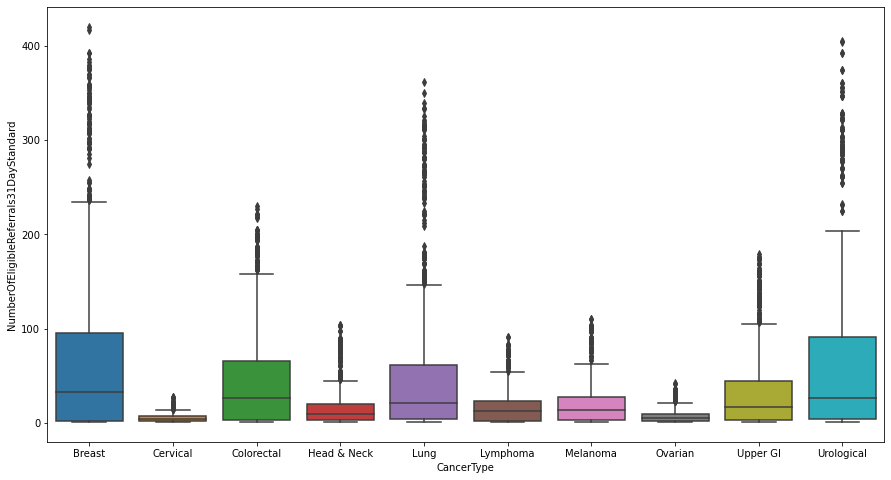

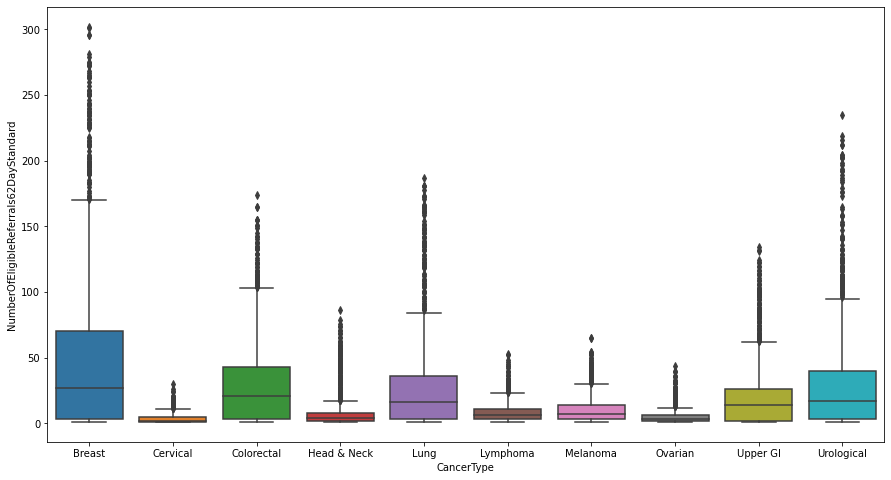

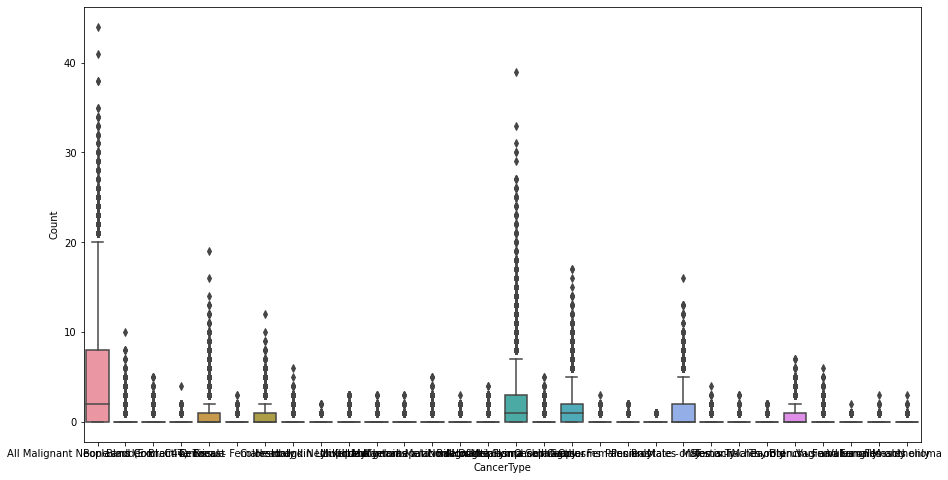

In [38]:
# take a look at what we have

print(df.corr())

print(df1.corr())

print(df2.corr())

# plot eligibles per cancer type
plt.figure(figsize=(15,8))
ax =sns.boxplot(y='NumberOfEligibleReferrals31DayStandard',x='CancerType',data=df)
plt.show()

plt.figure(figsize=(15,8))
ax =sns.boxplot(y='NumberOfEligibleReferrals62DayStandard',x='CancerType',data=df1)
plt.show()

plt.figure(figsize=(15,8))
ax =sns.boxplot(y='Count',x='CancerType',data=df2) # we need to group cancer types!!
plt.show()

In [39]:
## BUILD GLMS 

# FOR 31 DAYS DATA

# choose explanatory variables
X0 = df[['Date','CancerType','HB']] # no pandemic
X0_p = df[['Pandemic','CancerType','HB']] # pandemic, no data
X0_dp = df[['Date','Pandemic','CancerType','HB']] # both
# choose output data
Y0 = df['NumberOfEligibleReferrals31DayStandard']



## FOR 62 DAYS DATA

# choose explanatory variables
X1 = df1[['Date','HB','CancerType']]#, 'CancerType', 'Sex']]
X1_p = df1[['Pandemic','CancerType','HB']]
X1_dp = df1[['Date','Pandemic','CancerType','HB']]
# choose output data
Y1 = df1['NumberOfEligibleReferrals62DayStandard']



## FOR WEEKLY DIAGNOSIS DATA

X2= df2[['Date','HB', 'Sex','Age Group']]
X2_p = df2[['Pandemic','HB', 'Sex','Age Group']]
X2_dp = df2[['Pandemic','HB', 'Sex','Age Group']]
Y2 = df2['Count']



In [54]:
print(df2['CancerType'].unique())
df['CancerType'].unique()

['All Malignant Neoplasms (Excl. C44)' 'Bladder'
 'Bone and Connective Tissue' 'Brain Tumour' 'Breast'
 'Cervical - Females only' 'Colorectal' 'Head and Neck' 'Hodgkin Lymphoma'
 'Kidney' 'Leukaemias' 'Liver and Intrahepatic Bile Ducts'
 'Malignant Melanoma of the Skin'
 'Multiple Myeloma and malignant plasma cell neoplasms'
 'Non-Hodgkin lymphoma' 'Non-Melanoma Skin Cancer' 'Oesophagus' 'Other'
 'Ovary - Females only' 'Pancreas' 'Penis - Males only'
 'Prostate - Males only' 'Stomach' 'Testis - Males only' 'Thyroid'
 'Trachea, Bronchus and Lung' 'Uterus - Females only'
 'Vagina - Females only' 'Vulva - Females only' 'Mesothelioma']


array(['Breast', 'Cervical', 'Colorectal', 'Head & Neck', 'Lung',
       'Lymphoma', 'Melanoma', 'Ovarian', 'Upper GI', 'Urological'],
      dtype=object)

In [55]:
# choose data
X=X2_p
Y=Y2

# run poisson regression for chosen data
parameters, intercept, coefficients, y_test, predictions, stats = poissonR(X,Y,1)

In [56]:
# take a look at results
print(intercept)

print(coefficients)


-2.4314990421789107
                   Coefficient
Pandemic             -0.127376
HB_S08000019          0.774130
HB_S08000020          1.409821
HB_S08000022          0.973390
HB_S08000024          1.755423
HB_S08000025         -1.551383
HB_S08000026         -1.707240
HB_S08000028         -1.269548
Sex_Male              0.149284
Age Group_50 - 69     1.357026
Age Group_70+         1.492386


/home/s1657372/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     624.4
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:20:56   Log-Likelihood:            -1.8618e+05
No. Observations:               84520   AIC:                         3.724e+05
Df Residuals:                   84508   BIC:                         3.725e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.1990      0.02

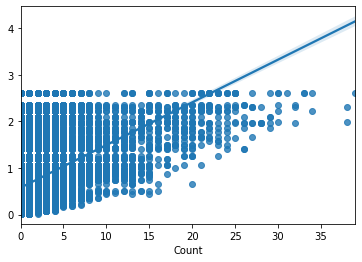

In [57]:
# check predictive power
sns.regplot(y_test,predictions)


print(stats)